In [1]:
import os
import warnings
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)
os.getcwd()

'/home/m/repo/ThinkBayes2/mine'

In [2]:
random_seed = 17
max_automl_models = 5
train_fraction = 2/3

In [3]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


def tsplot(y, lags=15, plot_title="Time series"):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    # layout
    fig = plt.figure(figsize=(14, 6))
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    # ts plot
    y.plot(ax=ts_ax)
    ts_ax.set_title(plot_title)

    # acf, pacf
    plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
    plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

    plt.show()

def preprocess(df, index_col):
    df.columns = df.columns.str.lower()
    df['date_time'] = df['date_time'].dt.tz_localize(None)
    df = df.set_index(index_col)
    return df

In [4]:
price_dm = pd.read_csv('data/price_dm.csv', parse_dates=['Date_Time'])
seps = pd.read_csv('data/seps.csv', parse_dates=['Date_Time'])
soda = pd.read_csv('data/soda.csv', parse_dates=['Date_Time'])

price_dm = preprocess(price_dm, 'date_time')
seps = preprocess(seps, 'date_time')
soda = preprocess(soda, 'date_time')

In [5]:
price_dm = price_dm.resample('H').mean()
seps = seps.resample('H').mean()
soda = soda.resample('H').mean()

In [14]:
y = price_dm['price_dm'].resample('D').median()
# y = pd.Series(np.random.randn(100))

- **ACF** pro zpoždění 2 bere v potaz jen první dva sloupce, mezi nimiž počítá korelační koeficient.
- **PACF** pro zpoždění 2 očišťuje o vliv sloupce třetího: provede regresi 1. sloupce na základě třetího, dále regresi 2. sloupce na základě třetího a spočítá korelační koeficient mezi rezidui obou regresí. (viz příklad s rybami a plavci)

**autoregresní proces** 
Pokud se bude do aktuálních dat promítat vliv dat předchozích, např. **$X_t$ je nějakým způsobem ovlivněno $X_{t-1}$**, lze očekávat, že (absolutní) hodnoty ACF budou postupně klesat, neboť $X_t$ je přímo ovlivněno $X_{t-1}$, do něhož se zase promítá vliv $X_{t-2}$, jež tedy takto ovlivňuje (v menší míře) i ono $X_t$. Totéž platí pro $X_{t-2}$ atd. Pokud bychom se podívali na hodnoty PACF, pak bychom viděli silnou korelaci mezi $X_t$ a $X_{t-1}$, ale další hodnoty už by byly blízké nule, neboť PACF je od vlivu ostatních hodnot očištěno.

**klouzavých průměrů** 
Pokud se do aktuálních dat bude promítat pouze přímý vliv šumu z dat předchozích, tedy **$X_t$ bude ovlivněno přímo šumem $\varepsilon_t$ a dejme tomu ještě $\varepsilon_{t-1}$, nikoliv ovšem skrz $X_{t-1}$**, potom je situace jiná. Tento přímý vliv totiž zajistí, že do $X_t$ se nemají jak zpropagovat jiné, starší veličiny. V ACF tedy budeme čekat pouze vysoké hodnoty u současné a předchozí veličiny, ostatní budou blízké nule. Parciální autokorelace bude k nule klesat, ale nedá se o ní říci něco konkrétnějšího.
'''

/home/m/miniconda3/envs/ThinkBayes2/lib/python3.8/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


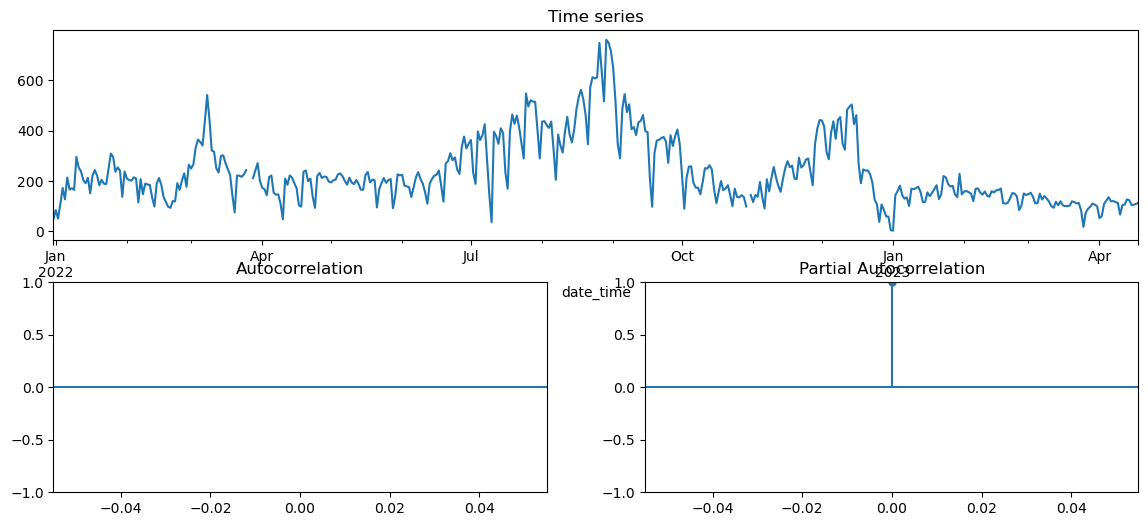

In [15]:
tsplot(y, lags = 24)

In [ ]:
import plotly.express as px

fig = px.histogram(train, x='wind_speed', histnorm='probability density')
fig.show()